In [1]:
#import libraries
import time
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
#Data Cleaning
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer
import string
#Model Evaludation
from sklearn.metrics import accuracy_score
from sklearn import metrics
#Model Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Using TensorFlow backend.


In [0]:
porter = PorterStemmer()
lancaster=LancasterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
stopwords_en = stopwords.words("english")
punctuations="?:!.,;'\"-()*"

In [0]:
#utility function to clean the dataset
def datacleaning(remove_stopwords,useStemming,useLemma,removePuncs,newdata):
  cleanReview=[]
  for x in range(0,len(newdata.values)):
    tmpReview=[]
    for w in nltk.word_tokenize(newdata.values[x]):
        newWord = str(w).lower() #Set newWork to be the updated word
        if remove_stopwords and (w in stopwords_en):#if the word is a stopword & we want to remove stopwords
            continue #skip the word and don’t had it to the normalized review
        if removePuncs and (w in punctuations):#if the word is a punc. & we want to remove punctuations
            continue #skip the word and don’t had it to the normalized review
        if useStemming: #if useStemming is set to True
            #Keep one stemmer commented out
            #newWord = porter.stem(newWord) #User porter stemmer
            newWord = lancaster.stem(newWord) #Use Lancaster stemmer
        if useLemma:
            newWord = wordnet_lemmatizer.lemmatize(newWord)
        tmpReview.append(newWord) #Add normalized word to the tmp review
    cleanReview.append(' '.join(tmpReview))
  return cleanReview

In [0]:
#Read the dataset
url= 'https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv'
dataset = pd.read_csv(url, sep='\t')

In [5]:
dataset.shape

(156060, 4)

In [6]:
#Top 10 Rows of dataset
dataset.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [7]:
dataset['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset['Phrase'],dataset['Sentiment'], test_size=0.3, random_state=2003)

In [9]:
print(X_train.shape)
print(X_test.shape)

(109242,)
(46818,)


In [10]:
temp_clean=pd.concat([X_train,Y_train],axis=1)
temp_clean.head(10)

,Phrase,Sentiment
13718,their ages,2
91191,gorgeous epic,4
97160,fans of the gross-out comedy,2
143983,"The filmmaker ascends , literally , to the Oly...",4
37501,twisting mystery,2
44396,including mine -RRB-,2
40166,more enjoyable than its predecessor,3
30005,film that 's flawed and brilliant in equal mea...,3
67570,bask,2
89575,If ever a concept came handed down from the mo...,4


In [0]:
#Train data cleaning
clean_x_train=datacleaning(True,False,True,True,X_train)

In [0]:
temp_clean['Cleaned']=clean_x_train

In [13]:
temp_clean.head(10)

,Phrase,Sentiment,Cleaned
13718,their ages,2,age
91191,gorgeous epic,4,gorgeous epic
97160,fans of the gross-out comedy,2,fan gross-out comedy
143983,"The filmmaker ascends , literally , to the Oly...",4,the filmmaker ascends literally olympus art world
37501,twisting mystery,2,twisting mystery
44396,including mine -RRB-,2,including mine -rrb-
40166,more enjoyable than its predecessor,3,enjoyable predecessor
30005,film that 's flawed and brilliant in equal mea...,3,film 's flawed brilliant equal measure
67570,bask,2,bask
89575,If ever a concept came handed down from the mo...,4,if ever concept came handed movie god silver p...


In [0]:
#check for empty entries after removing stop mords
#list(temp_clean['Cleaned']=='').count(True)

In [0]:
#drop empty entries
#nan_value = float("NaN")
#temp_clean.replace("", nan_value, inplace=True)
#temp_clean.dropna(subset = ["Cleaned"], inplace=True)

In [0]:
#drop duplicates
#temp_clean.drop_duplicates(subset=['Cleaned', 'Sentiment'],inplace=True)

In [17]:
temp_clean.shape

(109242, 3)

In [18]:
temp_clean['Sentiment'].value_counts()

2    55595
3    23055
1    19203
4     6468
0     4921
Name: Sentiment, dtype: int64

In [0]:
from sklearn.utils import resample
sentiment_0=temp_clean[temp_clean['Sentiment']==0]
sentiment_1=temp_clean[temp_clean['Sentiment']==1]
sentiment_2=temp_clean[temp_clean['Sentiment']==2]
sentiment_3=temp_clean[temp_clean['Sentiment']==3]
sentiment_4=temp_clean[temp_clean['Sentiment']==4]

sentiment_0_sample=resample(sentiment_0,replace=True,n_samples=55000,random_state=123)
sentiment_1_sample=resample(sentiment_1,replace=True,n_samples=55000,random_state=123)
#sentiment_2_sample=resample(sentiment_2,replace=True,n_samples=55000,random_state=123)
sentiment_3_sample=resample(sentiment_3,replace=True,n_samples=55000,random_state=123)
sentiment_4_sample=resample(sentiment_4,replace=True,n_samples=55000,random_state=123)


temp_dataset_upsampled = pd.concat([sentiment_2, sentiment_3_sample,sentiment_1_sample,sentiment_4_sample,sentiment_0_sample])

In [0]:
temp_dataset_upsampled=temp_dataset_upsampled.sample(frac=1)

In [21]:
temp_dataset_upsampled.head(10)

,Phrase,Sentiment,Cleaned
2852,filmmaking with a visually masterful work of q...,4,filmmaking visually masterful work quiet power
87383,"works so well for the first 89 minutes ,",3,work well first 89 minute
134573,falls far short of poetry,1,fall far short poetry
3993,Spielberg 's realization of a near-future Amer...,4,spielberg 's realization near-future america m...
132434,well acted by the four primary actors,4,well acted four primary actor
20965,a good deal funnier than his original,4,good deal funnier original
43246,meaningful for both kids and church-wary adults,4,meaningful kid church-wary adult
107717,"This rich , bittersweet Israeli documentary , ...",3,this rich bittersweet israeli documentary life...
53890,Is an Actress works,2,is actress work
48962,The Apple,2,the apple


In [22]:
temp_dataset_upsampled['Sentiment'].value_counts()

2    55595
4    55000
3    55000
1    55000
0    55000
Name: Sentiment, dtype: int64

In [0]:
#vectorizer = CountVectorizer(stop_words="english",ngram_range=(1, 1))
vectorizer_tfid = TfidfVectorizer(stop_words="english",ngram_range=(1, 2),max_features=3000)

x_train = vectorizer_tfid.fit_transform(temp_dataset_upsampled['Cleaned'])
y_train = temp_dataset_upsampled['Sentiment']
#x_test = vectorizer_tfid.transform(X_test)
#y_test = Y_test

In [24]:
x_train.shape

(275595, 3000)

In [0]:
x_train_np = x_train.toarray()
y_train_np = np.array(y_train)

In [26]:
print(x_train_np.shape)

(275595, 3000)


In [27]:
x_train_np=x_train_np.reshape(x_train_np.shape[0],x_train_np.shape[1],1)
print(x_train_np.shape)
y_train_np = to_categorical(y_train_np)
print(y_train_np.shape)

(275595, 3000, 1)
(275595, 5)


In [0]:
from keras import backend as K
def recall_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true*y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0 ,1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall

def precision_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true*y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0 ,1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  return precision

def f1_m(y_true, y_pred):
  precision = precision_m(y_true, y_pred)
  recall = recall_m(y_true, y_pred)
  return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
from keras.models import Sequential
from keras import layers
from keras.metrics import categorical_accuracy
from keras.layers import Dense, Conv1D, Conv2D ,Flatten, MaxPooling1D, MaxPooling2D,Dropout
from keras.layers import Activation, GlobalMaxPooling1D
from keras.layers import LeakyReLU
from keras import optimizers

In [30]:
#https://datascience.stackexchange.com/questions/10048/what-is-the-best-keras-model-for-multi-class-classification

cnnmodel2 = Sequential()
cnnmodel2.add(Conv1D(filters=32, kernel_size=2, activation='relu',input_shape=(x_train_np.shape[1],x_train_np.shape[2])))
cnnmodel2.add(MaxPooling1D(pool_size=2))
cnnmodel2.add(Dropout(rate=0.2))
cnnmodel2.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
cnnmodel2.add(MaxPooling1D(pool_size=2))
cnnmodel2.add(Dropout(rate=0.2))
cnnmodel2.add(Flatten())
cnnmodel2.add(layers.Dense(5, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [31]:
cnnmodel2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m,recall_m])
cnnmodel2.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2999, 32)          96        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1499, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1499, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1498, 64)          4160      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 749, 64)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 749, 64)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 47936)          

In [32]:
history2= cnnmodel2.fit(x_train_np, y_train_np, epochs=25, verbose=1, validation_split=0.2, batch_size = 64)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 220476 samples, validate on 55119 samples
Epoch 1/25





220476/220476 [==============================] - 49s 223us/step - loss: 1.1848 - acc: 0.5124 - f1_m: 0.4079 - precision_m: 0.6250 - recall_m: 0.3093 - val_loss: 1.0925 - val_acc: 0.5524 - val_f1_m: 0.4741 - val_precision_m: 0.6579 - val_recall_m: 0.3722
Epoch 2/25
220476/220476 [==============================] - 35s 156us/step - loss: 1.0856 - acc: 0.5563 - f1_m: 0.4897 - precision_m: 0.6546 - recall_m: 0.3929 - val_loss: 1.0686 - val_acc: 0.5603 - val_f1_m: 0.4990 - val_precision_m: 0.6566 - val_recall_m: 0.4040
Epoch 3/25
220476/220476 [==============================] - 34s 156us/step - loss: 1.0679 - acc: 0.5640 - f1_m: 0.5002 - precision_m: 0.6599 - recall_m: 0.4045 - val_loss: 1.0558 - val_acc: 0.5695 - val_f1_m: 0.4986 - val_precision_m: 0.6659 - val_recall_m: 0.4001
Epoch 4/25
220476/220476 [==========================

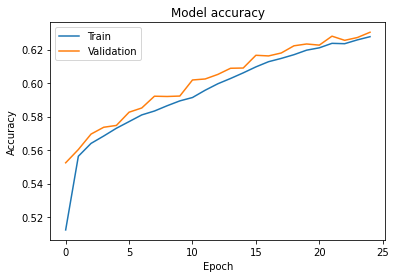

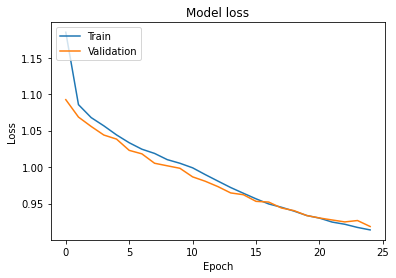

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:
temp_test=pd.concat([X_test,Y_test],axis=1)
temp_test.head(10)

,Phrase,Sentiment
13510,veteran,3
61932,many definitions,2
82549,a worthwhile glimpse,3
137718,past Seagal films,2
121990,banal script,1
3045,a surge through swirling rapids or a leap from...,2
64342,does n't really deliver for country music fans...,1
125461,backed off,1
49978,required reading,2
138979,the protagonists ' bohemian boorishness,1


In [0]:
#Train data cleaning
clean_x_test=datacleaning(True,False,True,True,X_test)

In [0]:
temp_test['CleanedTest']=clean_x_test

In [37]:
temp_test.shape

(46818, 3)

In [38]:
temp_test.head(10)

,Phrase,Sentiment,CleanedTest
13510,veteran,3,veteran
61932,many definitions,2,many definition
82549,a worthwhile glimpse,3,worthwhile glimpse
137718,past Seagal films,2,past seagal film
121990,banal script,1,banal script
3045,a surge through swirling rapids or a leap from...,2,surge swirling rapid leap pinnacle pinnacle
64342,does n't really deliver for country music fans...,1,n't really deliver country music fan family au...
125461,backed off,1,backed
49978,required reading,2,required reading
138979,the protagonists ' bohemian boorishness,1,protagonist bohemian boorishness


In [0]:
x_test = vectorizer_tfid.transform(temp_test['CleanedTest'])
y_test = temp_test['Sentiment']

In [0]:
# Convert the testing data
x_test_np = x_test.toarray()
y_test_np = np.array(y_test)

In [41]:
x_test_np=x_test_np.reshape(x_test_np.shape[0],x_test_np.shape[1],1)
print(x_test_np.shape)
y_test_np = to_categorical(y_test_np)
print(y_test_np.shape)

(46818, 3000, 1)
(46818, 5)


In [42]:
#testing results
print(cnnmodel2.metrics_names)
cnnmodel2.evaluate(x_test_np, y_test_np)

['loss', 'acc', 'f1_m', 'precision_m', 'recall_m']
46818/46818 [==============================] - 4s 87us/step


[1.1808334122484674,
 0.5439360929557008,
 0.49267141403150333,
 0.6012373844955655,
 0.41964628988850444]